<div class="alert alert-block alert-success">
     
# IC PCDA CAPSTONE - HARRY BAKHSHI - NOTEBOOK 3 - EDA VARIABLES SEASONAL DECOMPOSITION
     
</div>

MIT License for code used from https://github.com/PacktPublishing/Modern-Time-Series-Forecasting-with-Python in notebook:   
https://github.com/PacktPublishing/Modern-Time-Series-Forecasting-with-Python?tab=MIT-1-ov-file     

(Accessed 06/06/2024)

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os
import plotly.io as pio
pio.templates.default = "plotly_white"
import pandas as pd
import statsmodels.api as sm
import pickle

# Need to EDA variable seasons by seasonal decomposition to use to impute missing data in actual time series before seasonal decomposition of actual variables:

Load EDA timeseries:

In [3]:
#EDA timeseries:
file = '/Users/harrybakhshi/Desktop/Python_notes/data/PCDA_capstone/janatahack_demand_forecasting_data_eda_ts.pik'
# with open(file, 'wb') as f:
#     pickle.dump(ts_df, f) #write df to .pik file on disk
with open(file, 'rb') as f:
     ts_df = pickle.load(f) #load pickle file 'file' into variable
import pandas.api.types as ptypes
ptypes.is_datetime64_dtype(ts_df['timestamp'])
#^https://stackoverflow.com/questions/25043620/correct-way-to-check-if-pandas-dataframe-index-is-a-certain-type-datetimeindex
#Accessed 06/06/2024
ts_df_2 = ts_df.copy()
ts_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   timestamp           130 non-null    datetime64[ns]
 1   median_total_price  130 non-null    float64       
 2   median_base_price   130 non-null    float64       
 3   median_units_sold   130 non-null    float64       
 4   percent_featured    130 non-null    float64       
 5   percent_display     130 non-null    float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 6.2 KB


In [4]:
ts_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   timestamp           130 non-null    datetime64[ns]
 1   median_total_price  130 non-null    float64       
 2   median_base_price   130 non-null    float64       
 3   median_units_sold   130 non-null    float64       
 4   percent_featured    130 non-null    float64       
 5   percent_display     130 non-null    float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 6.2 KB


In [5]:
ts_df.tail(60)

,timestamp,median_total_price,median_base_price,median_units_sold,percent_featured,percent_display
70,2012-05-22,177.4125,205.9125,36.0,0.064935,0.149784
71,2012-05-29,200.9250,205.9125,34.0,0.063203,0.090909
72,2012-06-02,205.9125,208.0500,34.0,0.012121,0.114286
73,2012-06-03,178.1250,205.9125,43.0,0.127273,0.173160
74,2012-06-11,198.7875,213.0375,33.0,0.088312,0.125541
75,2012-06-19,178.8375,205.9125,44.0,0.216450,0.211255
76,2012-06-26,178.8375,205.9125,37.0,0.109091,0.191342
77,2012-07-08,205.9125,213.0375,31.0,0.034632,0.054545
78,2012-07-17,183.8250,212.3250,38.0,0.259740,0.185281
79,2012-07-24,205.9125,207.3375,31.0,0.006926,0.061472


Create function for formatting plotly plots:

In [6]:
#For formatting plots:
def format_plot(fig, legends = None, xlabel="Time", ylabel="Value", figsize=(500,900), font_size=15, title_font_size=20):
    if legends:
        names = cycle(legends)
        fig.for_each_trace(lambda t:  t.update(name = next(names)))
    fig.update_layout(
            autosize=False,
            width=figsize[1],
            height=figsize[0],
            title={
            'x':0.5,
            'xanchor': 'center',
            'yanchor': 'top'},
            titlefont={
                "size": 20
            },
            legend_title = None,
            legend=dict(
                font=dict(size=font_size),
                orientation="h",
                yanchor="bottom",
                y=0.98,
                xanchor="right",
                x=1,
            ),
            yaxis=dict(
                title_text=ylabel,
                titlefont=dict(size=font_size),
                tickfont=dict(size=font_size),
            ),
            xaxis=dict(
                title_text=xlabel,
                titlefont=dict(size=font_size),
                tickfont=dict(size=font_size),
            )
        )
    return fig

#^https://github.com/PacktPublishing/Modern-Time-Series-Forecasting-with-Python/blob/main/notebooks/Chapter03/01-Visualizing%20Time%20Series.ipynb
#Accessed 06/06/2024

Impute missing values for October 2013:

In [7]:
from src.imputation.interpolation import SeasonalInterpolation
import datetime
new_row_data = []
for i in range(6):
    new_row_data.append(np.nan)
    #^https://www.analyticsvidhya.com/blog/2023/12/supercharge-your-dataframes-mastering-row-appending-in-pandas/#:~:text=The%20append()%20function%20in,for%20beginners%20and%20seasoned%20professionals.&text=While%20this%20method%20is%20simple,multiple%20rows%20in%20a%20loop
    #Accessed 04/06/2024
print(new_row_data)
print(len(new_row_data))
timestamp = '09/07/2013'
index_list = []
for date in range(7):
    timestamp = pd.to_datetime(timestamp) + pd.DateOffset(days=7)
    index_list.insert(date, timestamp)
#^https://stackoverflow.com/questions/6871016/adding-days-to-a-date-in-python
#Accessed 09/06/2024
print(index_list)
from pandas import DataFrame, concat
for row in range(7):
    line = DataFrame(np.array([new_row_data]), columns=['timestamp', 'median_total_price', 'median_base_price', 'median_units_sold', 'percent_featured', 'percent_display'])
    ts_df = concat([ts_df.iloc[:126 + row + 1], line, ts_df.iloc[row + 126 + 1:]]).reset_index(drop=True)
    #^https://stackoverflow.com/questions/15888648/is-it-possible-to-insert-a-row-at-an-arbitrary-position-in-a-dataframe-using-pan
    #Accessed 03/06/2024
    ts_df.loc[row + 126 + 1, ts_df.columns.values[0]] = index_list[row]
print(ts_df_2.info())
#data approx. every week - for median_total_price 6 month season - (6*4) weeks:
ts_df['median_total_price'] = SeasonalInterpolation(seasonal_period=6*4).fit_transform(ts_df.median_total_price.values.reshape(-1,1))
#data approx. every week - for median_base_price 3.5 month season - (3.5*4 = 14*1) weeks:
ts_df['median_base_price'] = SeasonalInterpolation(seasonal_period=14*1).fit_transform(ts_df.median_base_price.values.reshape(-1,1))
#data approx. every week - for median_base_price assume 6 month season - (6*4) weeks:
ts_df['median_units_sold'] = SeasonalInterpolation(seasonal_period=6*4).fit_transform(ts_df.median_units_sold.values.reshape(-1,1))
#data approx. every week - for percent_featured assume 4 month season - (16*1) weeks:
ts_df['percent_featured'] = SeasonalInterpolation(seasonal_period=6*4).fit_transform(ts_df.percent_featured.values.reshape(-1,1))
#data approx. every week - for percent_display assume 1 year season - (52) weeks:
ts_df['percent_display'] = SeasonalInterpolation(seasonal_period=6*4).fit_transform(ts_df.percent_display.values.reshape(-1,1))
print(ts_df.tail(20))
#^https://github.com/PacktPublishing/Modern-Time-Series-Forecasting-with-Python/blob/main/notebooks/Chapter03/01-Visualizing%20Time%20Series.ipynb
#Accessed 06/06/2024

[nan, nan, nan, nan, nan, nan]
6
[Timestamp('2013-09-14 00:00:00'), Timestamp('2013-09-21 00:00:00'), Timestamp('2013-09-28 00:00:00'), Timestamp('2013-10-05 00:00:00'), Timestamp('2013-10-12 00:00:00'), Timestamp('2013-10-19 00:00:00'), Timestamp('2013-10-26 00:00:00')]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   timestamp           130 non-null    datetime64[ns]
 1   median_total_price  130 non-null    float64       
 2   median_base_price   130 non-null    float64       
 3   median_units_sold   130 non-null    float64       
 4   percent_featured    130 non-null    float64       
 5   percent_display     130 non-null    float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 6.2 KB
None
     timestamp  median_total_price  median_base_price  median_units_sold  \
117 2013-05-03          178.125000  

/var/folders/xn/_bz_k2_x60v2l_s_sch6rwp40000gn/T/ipykernel_92656/3736684854.py:21: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  ts_df = concat([ts_df.iloc[:126 + row + 1], line, ts_df.iloc[row + 126 + 1:]]).reset_index(drop=True)


Create seasonality terms:

In [8]:
ts_df_2 = ts_df.copy()
ts_df = ts_df.set_index("timestamp")
ts_df["weekday_name"] = ts_df.index.day_name()
ts_df["weekday"] = ts_df.index.weekday
ts_df["week"] = ts_df.index.isocalendar().week
ts_df["day"] = ts_df.index.day
ts_df["date"] = ts_df.index.date
ts_df["month"] = ts_df.index.month
ts_df["month_name"] = ts_df.index.month_name()
ts_df["year"] = ts_df.index.year
#Making ordered categoricals to make for sorted plots
ts_df['month_name'] = pd.Categorical(ts_df['month_name'], categories=["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"], ordered=True)
ts_df['weekday_name'] = pd.Categorical(ts_df['weekday_name'], categories=["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"], ordered=True)
ts_df.head(60)
#^https://github.com/PacktPublishing/Modern-Time-Series-Forecasting-with-Python/blob/main/notebooks/Chapter03/01-Visualizing%20Time%20Series.ipynb
#Accessed 06/06/2024

,median_total_price,median_base_price,median_units_sold,percent_featured,percent_display,weekday_name,weekday,week,day,date,month,month_name,year
timestamp,,,,,,,,,,,,,
2011-01-08,205.9125,205.9125,28.0,0.066667,0.077922,Saturday,5,1,8,2011-01-08,1,January,2011
2011-01-17,190.2375,205.9125,38.0,0.189610,0.163636,Monday,0,3,17,2011-01-17,1,January,2011
2011-01-24,190.2375,205.9125,37.0,0.274459,0.195671,Monday,0,4,24,2011-01-24,1,January,2011
2011-01-31,210.1875,210.9000,33.0,0.010390,0.096104,Monday,0,5,31,2011-01-31,1,January,2011
2011-02-05,210.9000,211.6125,31.0,0.000000,0.089177,Saturday,5,5,5,2011-02-05,2,February,2011
2011-02-14,173.1375,210.1875,37.0,0.105628,0.208658,Monday,0,7,14,2011-02-14,2,February,2011
2011-02-21,172.4250,205.9125,35.0,0.034632,0.198268,Monday,0,8,21,2011-02-21,2,February,2011
2011-02-28,177.4125,205.9125,33.0,0.064935,0.148052,Monday,0,9,28,2011-02-28,2,February,2011
2011-03-10,205.2000,205.9125,38.0,0.173160,0.171429,Thursday,3,10,10,2011-03-10,3,March,2011


Import libraries for multi-seasonal decomposition:

In [9]:
#Import libraries for multi-seasonal decomposition:
from statsmodels.tsa.seasonal import seasonal_decompose
from src.decomposition.seasonal import STL, FourierDecomposition, MultiSeasonalDecomposition

Create series for each variable:

In [10]:
# numeric variables:
# median_total_price = median sales price for all product retailings in all stores (numeric, float)               
# median_base_price = median base price for all product retailings in all stores (numeric, float)
# median_units_sold = median total units sold for all product retailings in all stores (numeric, stored as float, but
#only integer)
# percent_featured = percent of retailings of products in all stores recorded where products were featured 
#(numeric, float)
# percent_display = percent of retailings of products in all stores recorded where products were displayed 
#prominently in store (numeric, float)
ts_median_total_price = ts_df.median_total_price
ts_median_base_price = ts_df.median_base_price
ts_median_units_sold = ts_df.median_units_sold
ts_percent_featured = ts_df.percent_featured
ts_percent_display = ts_df.percent_display

In [11]:
# ts_median_total_price = ts_df.median_total_price.values.reshape(-1,1).squeeze()
ts_percent_featured
ts_percent_display

timestamp
2011-01-08    0.077922
2011-01-17    0.163636
2011-01-24    0.195671
2011-01-31    0.096104
2011-02-05    0.089177
                ...   
2013-10-19    0.179876
2013-10-26    0.168759
2013-11-06    0.119481
2013-12-02    0.212121
2013-12-03    0.200000
Name: percent_display, Length: 137, dtype: float64

# EDA VARIABLE MULTI-SEASONAL DECOMPOSITION USING FOURIER DECOMPOSITION

* Use Fourier terms over STL method because this is "robust to outliers" when "doing regularized regression using the Fourier terms on the signal", "decoupling the resolution of the data and the expected seasonality".     

^Source: Modern Time Series Forecasting with Python (Manu Joseph, 2022)


Plot multi-seasonal decomposition using Fourier Decomposition as a seasonal model:

Make custom seasonality term using "month" and "week_of_month":

In [12]:
#Making custom seasonality term
ts_df["week_of_month"] = pd.Series(np.zeros(len(ts_df)), index=ts_df.index)
from math import ceil
def get_week_of_month(date):
   first_day = date.replace(day=1)

   day_of_month = date.day

   if(first_day.weekday() == 6):
       adjusted_dom = day_of_month + ((1 + first_day.weekday()) / 7)
   else:
       adjusted_dom = day_of_month + first_day.weekday()

   return int(ceil(adjusted_dom/7.0))
#^https://stackoverflow.com/questions/3806473/week-number-of-the-month/26662038#26662038
#Accessed 10/06/2024
for row in range(len(ts_df_2)):
    ts_df["week_of_month"][row] = get_week_of_month(ts_df_2['timestamp'][row])
#Creating a sorted unique combination df
map_df = ts_df[["month", "week_of_month"]].drop_duplicates().sort_values(["month", "week_of_month"])
# Assigning an ordinal variable to capture the order
map_df["map"] = np.arange(1, len(map_df)+1)
# mapping the oprdinal mapping back to the original df and getting the seasonality array
seasonality = ts_df.merge(map_df, on=["month", "week_of_month"], how='left', validate="many_to_one")['map']
seasonality = seasonality.to_numpy(seasonality)
seasonality
#^https://github.com/PacktPublishing/Modern-Time-Series-Forecasting-with-Python/blob/main/notebooks/Chapter03/02-Decomposing%20Time%20Series.ipynb
#Accessed 06/06/2024

/var/folders/xn/_bz_k2_x60v2l_s_sch6rwp40000gn/T/ipykernel_92656/413877167.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ts_df["week_of_month"][row] = get_week_of_month(ts_df_2['timestamp'][row])
/var/folders/xn/_bz_k2_x60v2l_s_sch6rwp40000gn/T/ipykernel_92656/413877167.py:18: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  ts_df["week_of_month"][row] = get_week_of_month(ts_df_2['timestamp'][row])


array([ 2,  4,  5,  6,  7,  9, 10, 11, 13, 14, 15, 16, 18, 18, 20, 21, 23,
       23, 24, 25, 26, 28, 29, 30, 31, 32, 32, 34, 35, 36, 38, 39, 40, 41,
       43, 45, 46, 49, 50, 51, 52, 53, 54, 55, 56, 57, 59, 60, 61, 62,  1,
        3,  4,  5,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 18, 18, 19, 20,
       22, 24, 25, 26, 27, 27, 29, 30, 31, 33, 34, 35, 36, 37, 39, 40, 41,
       42, 44, 45, 46, 47, 47, 49, 50, 51, 54, 55, 55, 56, 57, 59, 61, 62,
        1,  3,  4,  5,  8,  8, 10, 11, 15, 16, 17, 19, 20, 21, 22, 22, 24,
       25, 26, 30, 31, 32, 37, 42, 43, 44, 45, 46, 47, 48, 49, 50, 54, 58,
       58])

N.B. - made mistake originally in creating week_of_month seasonality term:
Original function:
    
    def get_week_of_month(date):
       first_day = date.replace(day=1)
    
       day_of_month = date.day
    
       if(first_day.weekday() == 6):
           adjusted_dom = (1 + first_day.weekday()) / 7
       else:
           adjusted_dom = day_of_month + first_day.weekday()
    
       return int(ceil(adjusted_dom/7.0))
    #^https://stackoverflow.com/questions/3806473/week-number-of-the-month/26662038#26662038
    #Accessed 10/06/2024
Should have been:
    
    def get_week_of_month(date):
       first_day = date.replace(day=1)
    
       day_of_month = date.day
    
       if(first_day.weekday() == 6):
           adjusted_dom = day_of_month + ((1 + first_day.weekday()) / 7)
       else:
           adjusted_dom = day_of_month + first_day.weekday()
    
       return int(ceil(adjusted_dom/7.0))
    #^https://stackoverflow.com/questions/3806473/week-number-of-the-month/26662038#26662038
    #Accessed 10/06/2024
Corrected week_of_month col in df here. Means seasonality resolution was worse, and residuals will be slightly off, thankfully the difference is extremely small though (see 2 graphs in notebook 4). Did not have time in this capstone project to redo the fits.

Median Sales Price:

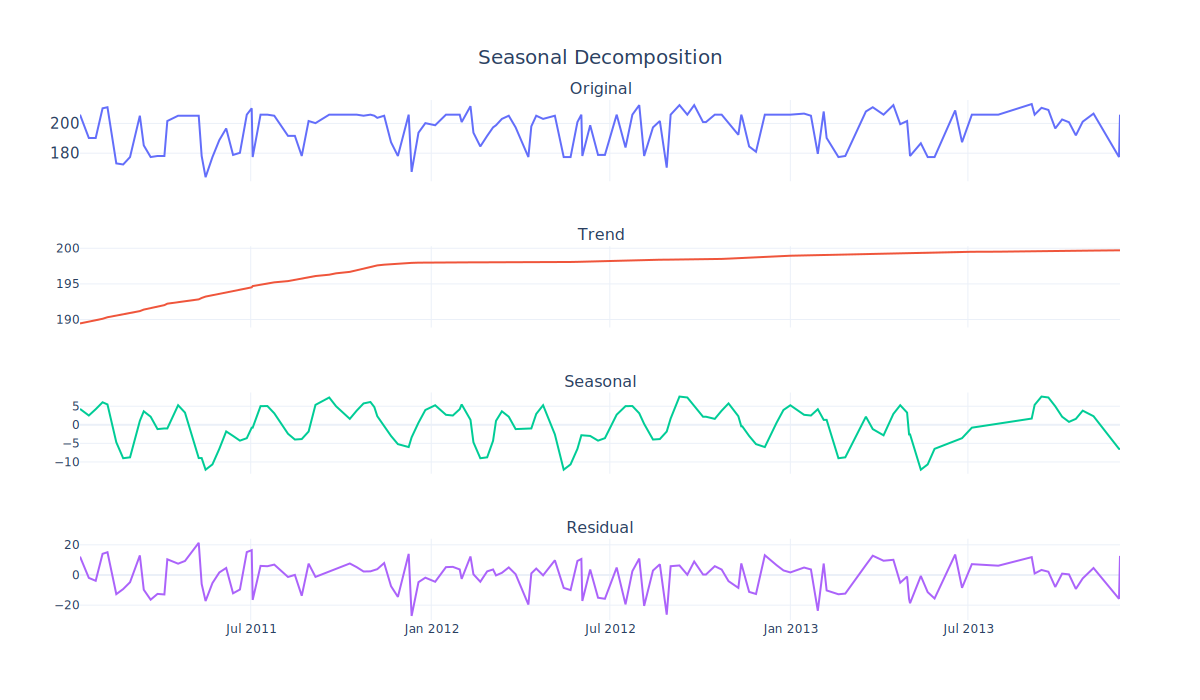

In [13]:
#Plot multi-seasonal decomposition using Fourier Decomposition as a seasonal model:
stl = FourierDecomposition(model = "additive", n_fourier_terms=10)
res_ts_eda_median_total_price = stl.fit(ts_median_total_price, seasonality=seasonality)
fig = res_ts_eda_median_total_price.plot(interactive=True)
fig.update_layout(
            legend=dict(
                font=dict(size=15),
                orientation="h",
                yanchor="bottom",
                y=0.98,
                xanchor="right",
                x=1,
            ),
            yaxis=dict(
                # title_text=ylabel,
                titlefont=dict(size=15),
                tickfont=dict(size=15),
            ),
            xaxis=dict(
                # title_text=xlabel,
                titlefont=dict(size=15),
                tickfont=dict(size=15),
            )
        )
fig.write_image("/Users/harrybakhshi/Desktop/Python_notes/data/PCDA_capstone/multi_seasonal_decomposition_eda_median_total_price.png")
fig.show(renderer="svg")
#^https://github.com/PacktPublishing/Modern-Time-Series-Forecasting-with-Python/blob/main/notebooks/Chapter03/02-Decomposing%20Time%20Series.ipynb
#Accessed 06/06/2024

In [14]:
print(0.4*6)

2.4000000000000004


Observations: season every 12 months (see mid-Sept 2011 to mid-Sept 2012) = 52 weeks

Median Base Price:

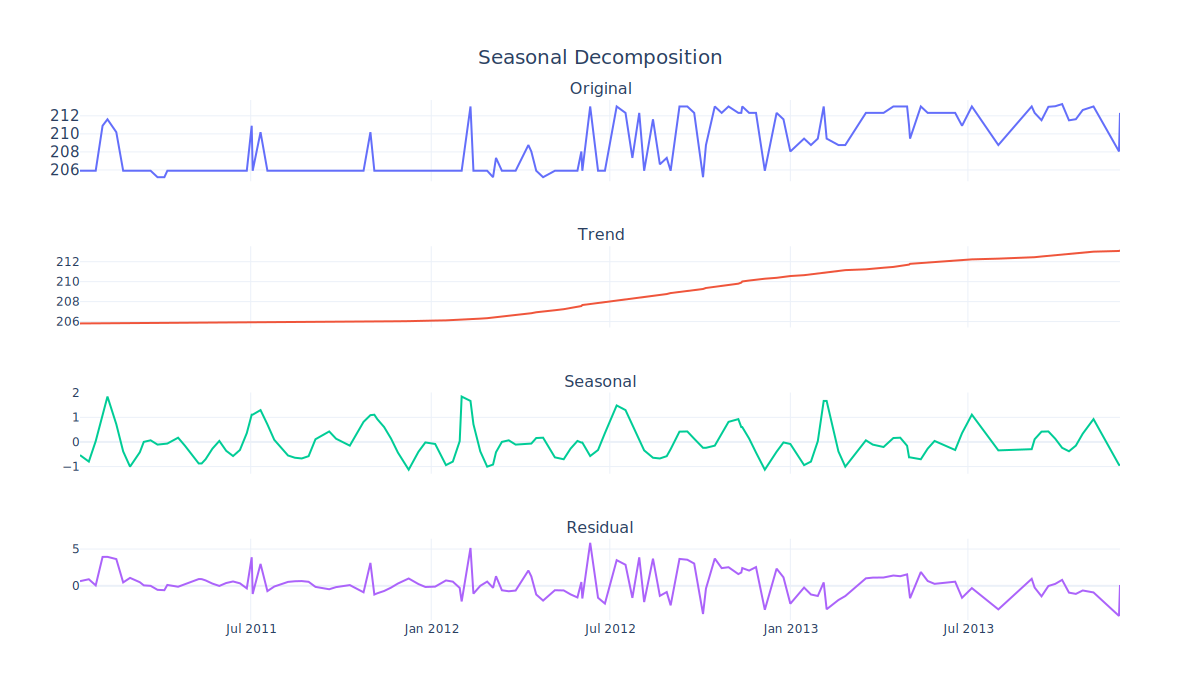

In [15]:
#Plot multi-seasonal decomposition using Fourier Decomposition as a seasonal model:
stl = FourierDecomposition(model = "additive", n_fourier_terms=10)
res_ts_eda_median_base_price = stl.fit(ts_median_base_price, seasonality=seasonality)
fig = res_ts_eda_median_base_price.plot(interactive=True)
fig.update_layout(
            legend=dict(
                font=dict(size=15),
                orientation="h",
                yanchor="bottom",
                y=0.98,
                xanchor="right",
                x=1,
            ),
            yaxis=dict(
                # title_text=ylabel,
                titlefont=dict(size=15),
                tickfont=dict(size=15),
            ),
            xaxis=dict(
                # title_text=xlabel,
                titlefont=dict(size=15),
                tickfont=dict(size=15),
            )
        )
fig.write_image("/Users/harrybakhshi/Desktop/Python_notes/data/PCDA_capstone/multi_seasonal_decomposition_eda_median_base_price.png")
fig.show(renderer="svg")
#^https://github.com/PacktPublishing/Modern-Time-Series-Forecasting-with-Python/blob/main/notebooks/Chapter03/02-Decomposing%20Time%20Series.ipynb
#Accessed 06/06/2024

Observations: season every 12 months (see end of Jan 2012 to end of Jan 2013) = 52 weeks

Median Units Sold:

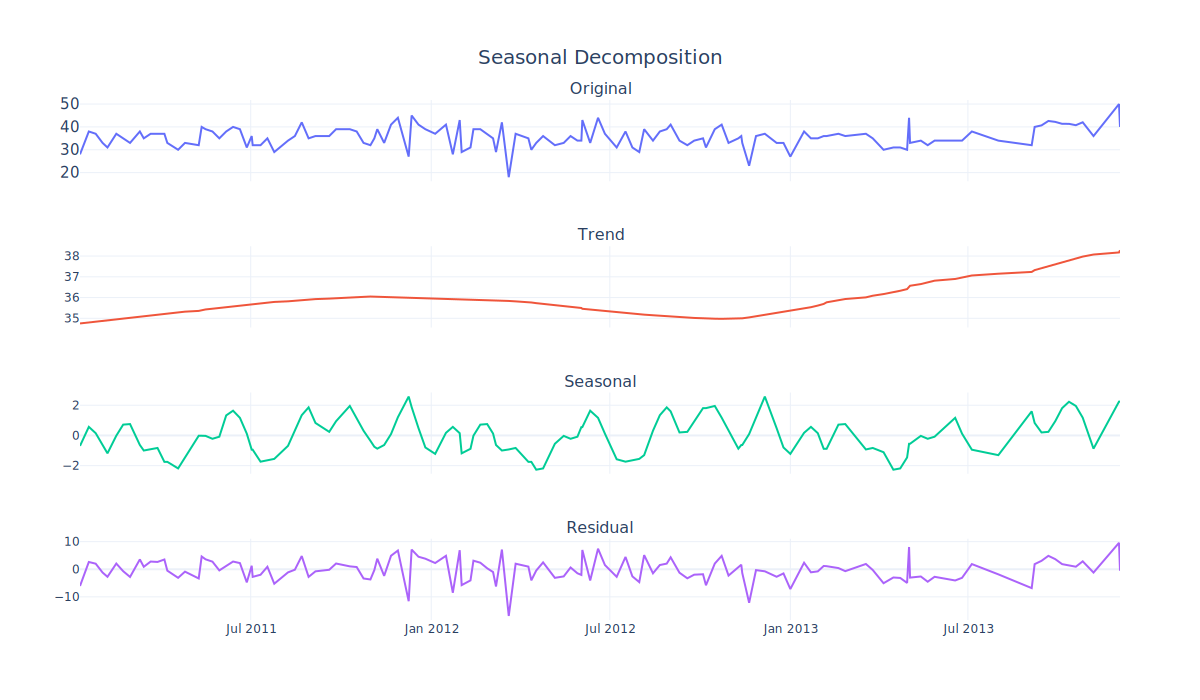

In [16]:
#Plot multi-seasonal decomposition using Fourier Decomposition as a seasonal model:
stl = FourierDecomposition(model = "additive", n_fourier_terms=10)
res_ts_eda_median_units_sold = stl.fit(ts_median_units_sold, seasonality=seasonality)
fig = res_ts_eda_median_units_sold.plot(interactive=True)
fig.update_layout(
            legend=dict(
                font=dict(size=15),
                orientation="h",
                yanchor="bottom",
                y=0.98,
                xanchor="right",
                x=1,
            ),
            yaxis=dict(
                # title_text=ylabel,
                titlefont=dict(size=15),
                tickfont=dict(size=15),
            ),
            xaxis=dict(
                # title_text=xlabel,
                titlefont=dict(size=15),
                tickfont=dict(size=15),
            )
        )
fig.write_image("/Users/harrybakhshi/Desktop/Python_notes/data/PCDA_capstone/multi_seasonal_decomposition_eda_median_units_sold.png")
fig.show(renderer="svg")
#^https://github.com/PacktPublishing/Modern-Time-Series-Forecasting-with-Python/blob/main/notebooks/Chapter03/02-Decomposing%20Time%20Series.ipynb
#Accessed 06/06/2024

Observations: season every 12 months (see mid-Sept 2011 to mid-Sept 2012) = 52 weeks

Percent Featured:

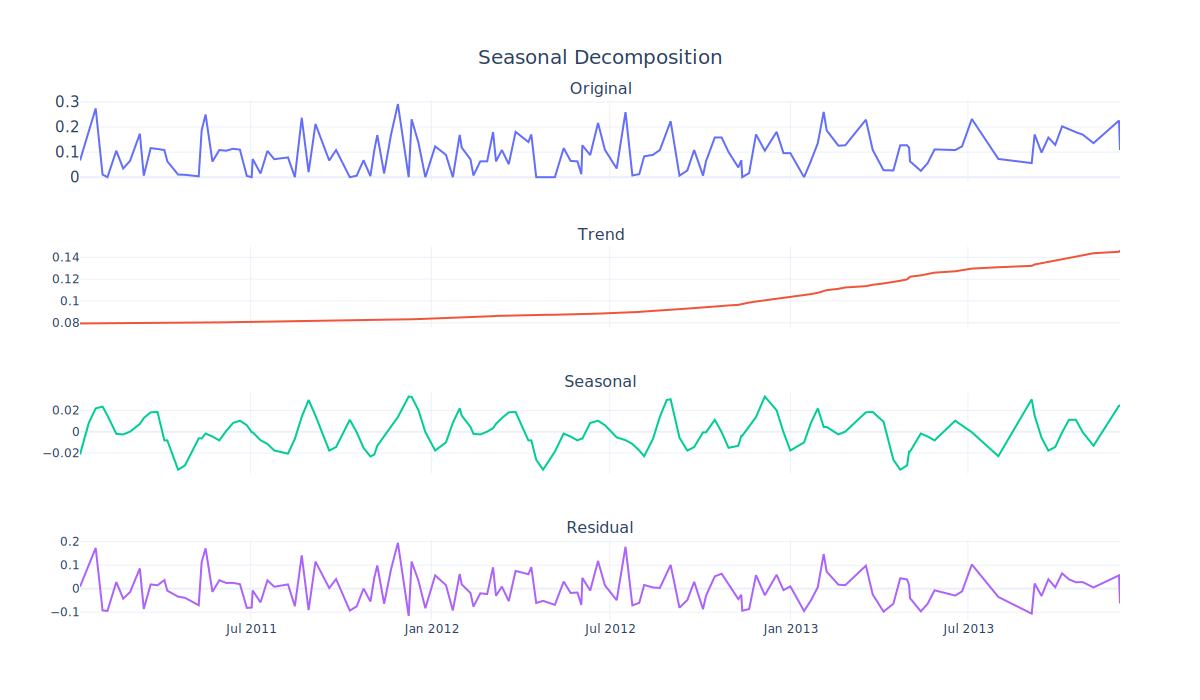

In [17]:
#Plot multi-seasonal decomposition using Fourier Decomposition as a seasonal model:
stl = FourierDecomposition(model = "additive", n_fourier_terms=10)
res_ts_eda_percent_featured = stl.fit(ts_percent_featured, seasonality=seasonality)
fig = res_ts_eda_percent_featured.plot(interactive=True)
fig.update_layout(
            legend=dict(
                font=dict(size=15),
                orientation="h",
                yanchor="bottom",
                y=0.98,
                xanchor="right",
                x=1,
            ),
            yaxis=dict(
                # title_text=ylabel,
                titlefont=dict(size=15),
                tickfont=dict(size=15),
            ),
            xaxis=dict(
                # title_text=xlabel,
                titlefont=dict(size=15),
                tickfont=dict(size=15),
            )
        )
fig.write_image("/Users/harrybakhshi/Desktop/Python_notes/data/PCDA_capstone/multi_seasonal_decomposition_eda_percent_featured.png")
fig.show(renderer="svg")
#^https://github.com/PacktPublishing/Modern-Time-Series-Forecasting-with-Python/blob/main/notebooks/Chapter03/02-Decomposing%20Time%20Series.ipynb
#Accessed 06/06/2024

Observations: season every 12 months (see end of Dec 2011 to end of Dec 2012) = 52 weeks

Percent Display:

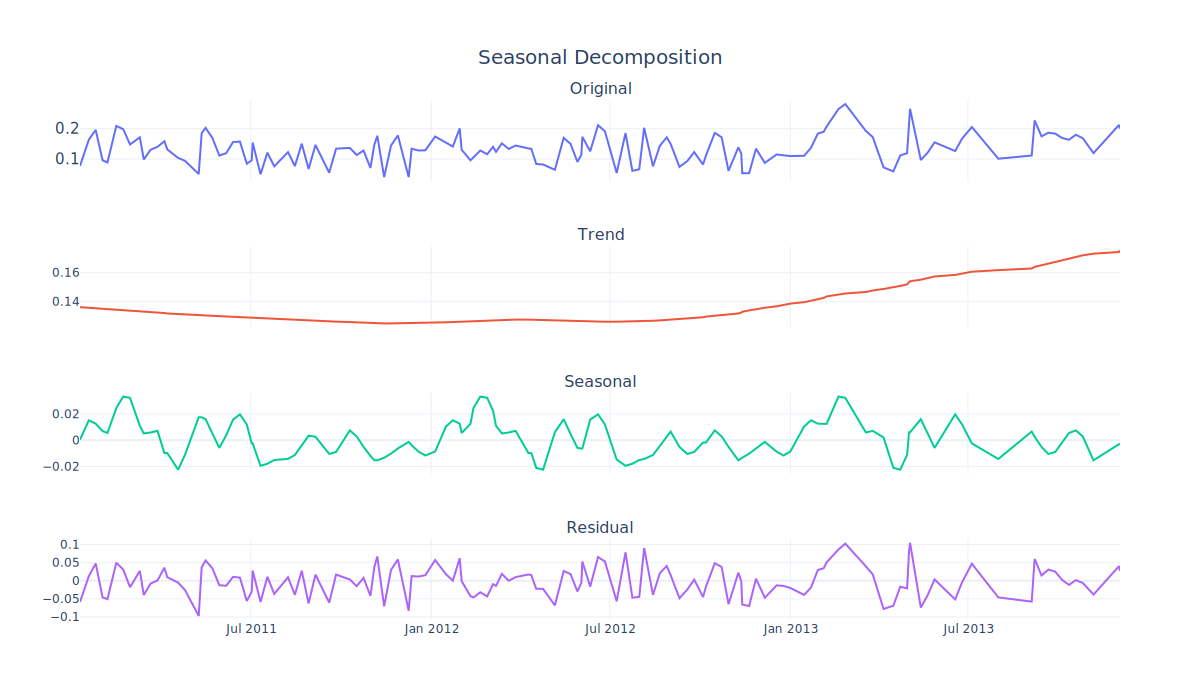

In [18]:
#Plot multi-seasonal decomposition using Fourier Decomposition as a seasonal model:
stl = FourierDecomposition(model = "additive", n_fourier_terms=10)
res_ts_eda_percent_display = stl.fit(ts_percent_display, seasonality=seasonality)
fig = res_ts_eda_percent_display.plot(interactive=True)
fig.update_layout(
            legend=dict(
                font=dict(size=15),
                orientation="h",
                yanchor="bottom",
                y=0.98,
                xanchor="right",
                x=1,
            ),
            yaxis=dict(
                # title_text=ylabel,
                titlefont=dict(size=15),
                tickfont=dict(size=15),
            ),
            xaxis=dict(
                # title_text=xlabel,
                titlefont=dict(size=15),
                tickfont=dict(size=15),
            )
        )
fig.write_image("/Users/harrybakhshi/Desktop/Python_notes/data/PCDA_capstone/multi_seasonal_decomposition_eda_percent_display.png")
fig.show(renderer="svg")
#^https://github.com/PacktPublishing/Modern-Time-Series-Forecasting-with-Python/blob/main/notebooks/Chapter03/02-Decomposing%20Time%20Series.ipynb
#Accessed 06/06/2024

In [19]:
print(0.3*6)
print(((0.3*6)-1.5)*0.5)
print(1.1499999999999999*52)

1.7999999999999998
0.1499999999999999
59.8


Original observations: season every 12.3 months (see mid Feb 2011 to end of Feb 2012) = 60 weeks
After correcting week_of_month seasonality term: = 52 weeks (see above)
60 weeks used to impute 7 values for percent display variables (see notebook 4). Didn't have time to re-impute these values and redo all fits for all variables in capstone project (see previous note on this in notebook and in notebook 4)

Pickle EDA variable multi-seasonal decompositions:

In [147]:
#Pickle EDA multi-seasonal decompositions:
file = '/Users/harrybakhshi/Desktop/Python_notes/data/PCDA_capstone/eda_multi_seasonal_decomp_fourier_median_total_price_correct.pik'
with open(file, 'wb') as f:
       pickle.dump(res_ts_eda_median_total_price, f) #write df to .pik file on disk
# with open(file, 'rb') as f:
#      res_ts_eda_median_total_price = pickle.load(f) #load pickle file 'file' into variable
file = '/Users/harrybakhshi/Desktop/Python_notes/data/PCDA_capstone/eda_multi_seasonal_decomp_fourier_median_base_price_correct.pik'
with open(file, 'wb') as f:
       pickle.dump(res_ts_eda_median_base_price, f) #write df to .pik file on disk
# with open(file, 'rb') as f:
#      res_ts_eda_median_base_price = pickle.load(f) #load pickle file 'file' into variable
file = '/Users/harrybakhshi/Desktop/Python_notes/data/PCDA_capstone/eda_multi_seasonal_decomp_fourier_median_units_sold_correct.pik'
with open(file, 'wb') as f:
       pickle.dump(res_ts_eda_median_units_sold, f) #write df to .pik file on disk
# with open(file, 'rb') as f:
#      res_ts_eda_median_units_sold = pickle.load(f) #load pickle file 'file' into variable
file = '/Users/harrybakhshi/Desktop/Python_notes/data/PCDA_capstone/eda_multi_seasonal_decomp_fourier_percent_featured_correct.pik'
with open(file, 'wb') as f:
       pickle.dump(res_ts_eda_percent_featured, f) #write df to .pik file on disk
# with open(file, 'rb') as f:
#      res_ts_eda_percent_featured = pickle.load(f) #load pickle file 'file' into variable
file = '/Users/harrybakhshi/Desktop/Python_notes/data/PCDA_capstone/eda_multi_seasonal_decomp_fourier_percent_display_correct.pik'
with open(file, 'wb') as f:
       pickle.dump(res_ts_eda_percent_display, f) #write df to .pik file on disk
# with open(file, 'rb') as f:
#      res_ts_eda_percent_displayed = pickle.load(f) #load pickle file 'file' into variable

# Conclusions:

- all EDA variables have seasonal period every 52 weeks
- investigate seasonal behaviour in actual ts data not binned per month or week of month - 3 years of data and from EDA max season is 60 weeks - do "year", "month" and "week_of_month" as seasonality terms to pass to the .fit() propetry of FourierDecomposition object used to seasonally decompose the data; if weak seasonality go down to "month" and "week_of_month", "week_of_month" or try first remove "week_of_month" etc., keeping maximum no. of seasonality terms allowing adequately resolved seasonality, to find seasonality